In [1]:
# 03_evaluate_and_predict.py
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Loading Final Model and Evaluating ---")

# 1. Load the saved models and the test data
final_model = joblib.load('models/fraud_detection_model.pkl')
X_test = joblib.load('data/X_test.pkl')
y_test = joblib.load('data/y_test.pkl')

print(f"Loaded models type: {type(final_model).__name__}")


--- Loading Final Model and Evaluating ---
Loaded model type: XGBClassifier



--- Analyzing Feature Importance ---


/tmp/ipykernel_128194/1521319135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')


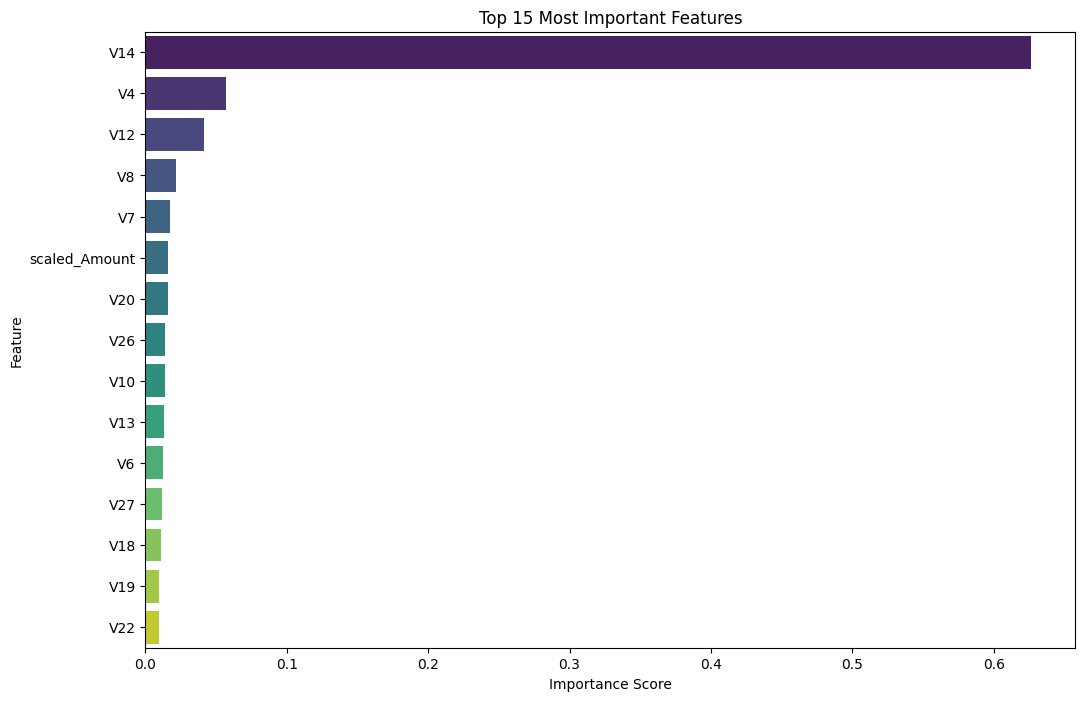

In [2]:
# 2. Feature Importance Analysis
# (This works for XGBoost and RandomForest)
if hasattr(final_model, 'feature_importances_'):
    print("\n--- Analyzing Feature Importance ---")
    importances = final_model.feature_importances_
    feature_names = X_test.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')
    plt.title('Top 15 Most Important Features')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()


In [3]:
# 3. Simulate a Prediction on a New Transaction
print("\n--- Simulating a Prediction on a New Transaction ---")
# We'll take one fraudulent case from our test set to see if the models catches it
new_transaction = X_test[y_test == 1].iloc[0]

# The models expects a DataFrame, so we convert the row
transaction_df = pd.DataFrame([new_transaction])

prediction = final_model.predict(transaction_df)
probability = final_model.predict_proba(transaction_df)

print(f"Transaction Features:\n{new_transaction}")
print("\n--- Prediction ---")
print(f"Model Prediction (0=Legit, 1=Fraud): {prediction[0]}")
print(f"Fraud Probability: {probability[0][1]:.4f}")

if prediction[0] == 1:
    print("Result: This transaction is flagged as FRAUDULENT.")
else:
    print("Result: This transaction is considered legitimate.")


--- Simulating a Prediction on a New Transaction ---
Transaction Features:
V1              -1.271244
V2               2.462675
V3              -2.851395
V4               2.324480
V5              -1.372245
V6              -0.948196
V7              -3.065234
V8               1.166927
V9              -2.268771
V10             -4.881143
V11              2.255147
V12             -4.686387
V13              0.652375
V14             -6.174288
V15              0.594380
V16             -4.849692
V17             -6.536521
V18             -3.119094
V19              1.715494
V20              0.560478
V21              0.652941
V22              0.081931
V23             -0.221348
V24             -0.523582
V25              0.224228
V26              0.756335
V27              0.632800
V28              0.250187
scaled_Amount   -0.353189
scaled_Time     -0.796134
Name: 77348, dtype: float64

--- Prediction ---
Model Prediction (0=Legit, 1=Fraud): 1
Fraud Probability: 1.0000
Result: This transaction is fla